In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
df = pd.read_csv('data/hw3.csv')

In [3]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [4]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


In [5]:
df.isnull().sum()

ts              0
open            0
high          504
low           289
close         136
volume          0
volumeUSD    2667
token           0
chain           0
dtype: int64

In [6]:
df.shape

(2667, 9)

<AxesSubplot:>

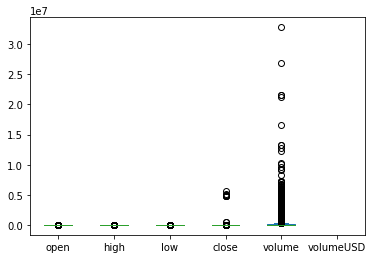

In [7]:
df.plot(kind='box')

In [8]:
df['ts'] = pd.to_datetime(df.ts)
df.set_index('ts', inplace = True)

In [9]:
df.sort_values(['token', 'ts'], inplace = True)
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 23:00:00,245.5420,245.9860,244.6680,NaN,465.868,NaN,"<span name=""tokenName"">AAVE</span>",ETH
2021-12-04 12:00:00,191.1000,191.5020,184.6110,187.4400,4854.272,NaN,"<span name=""tokenName"">AAVE</span>",ETH
2021-12-05 07:00:00,203.1970,204.1410,NaN,203.7640,1483.325,NaN,"<span name=""tokenName"">AAVE</span>",ETH
2021-12-07 00:00:00,186.5780,186.9160,184.0910,184.6910,4172.479,NaN,"<span name=""tokenName"">AAVE</span>",ETH
2021-12-07 02:00:00,185.2040,186.8380,NaN,182.9960,2527.875,NaN,"<span name=""tokenName"">AAVE</span>",ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,1.0005,NaN,1.0004,1.0004,7133859.470,NaN,USDT,USDT
2021-12-13 03:00:00,1.0004,1.0006,1.0004,1.0006,4337884.530,NaN,USDT,USDT
2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.910,NaN,USDT,USDT


In [10]:
df['high'].fillna(method='ffill', inplace=True)

In [11]:
df['low'].fillna(method='ffill', inplace=True)

In [12]:
df.isnull().sum()

open            0
high            0
low             0
close         136
volume          0
volumeUSD    2667
token           0
chain           0
dtype: int64

In [13]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

<AxesSubplot:>

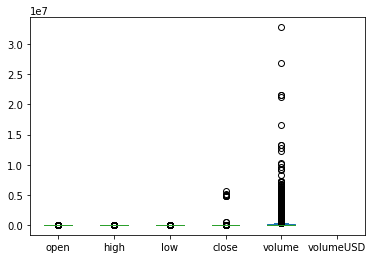

In [14]:
df.plot(kind='box')

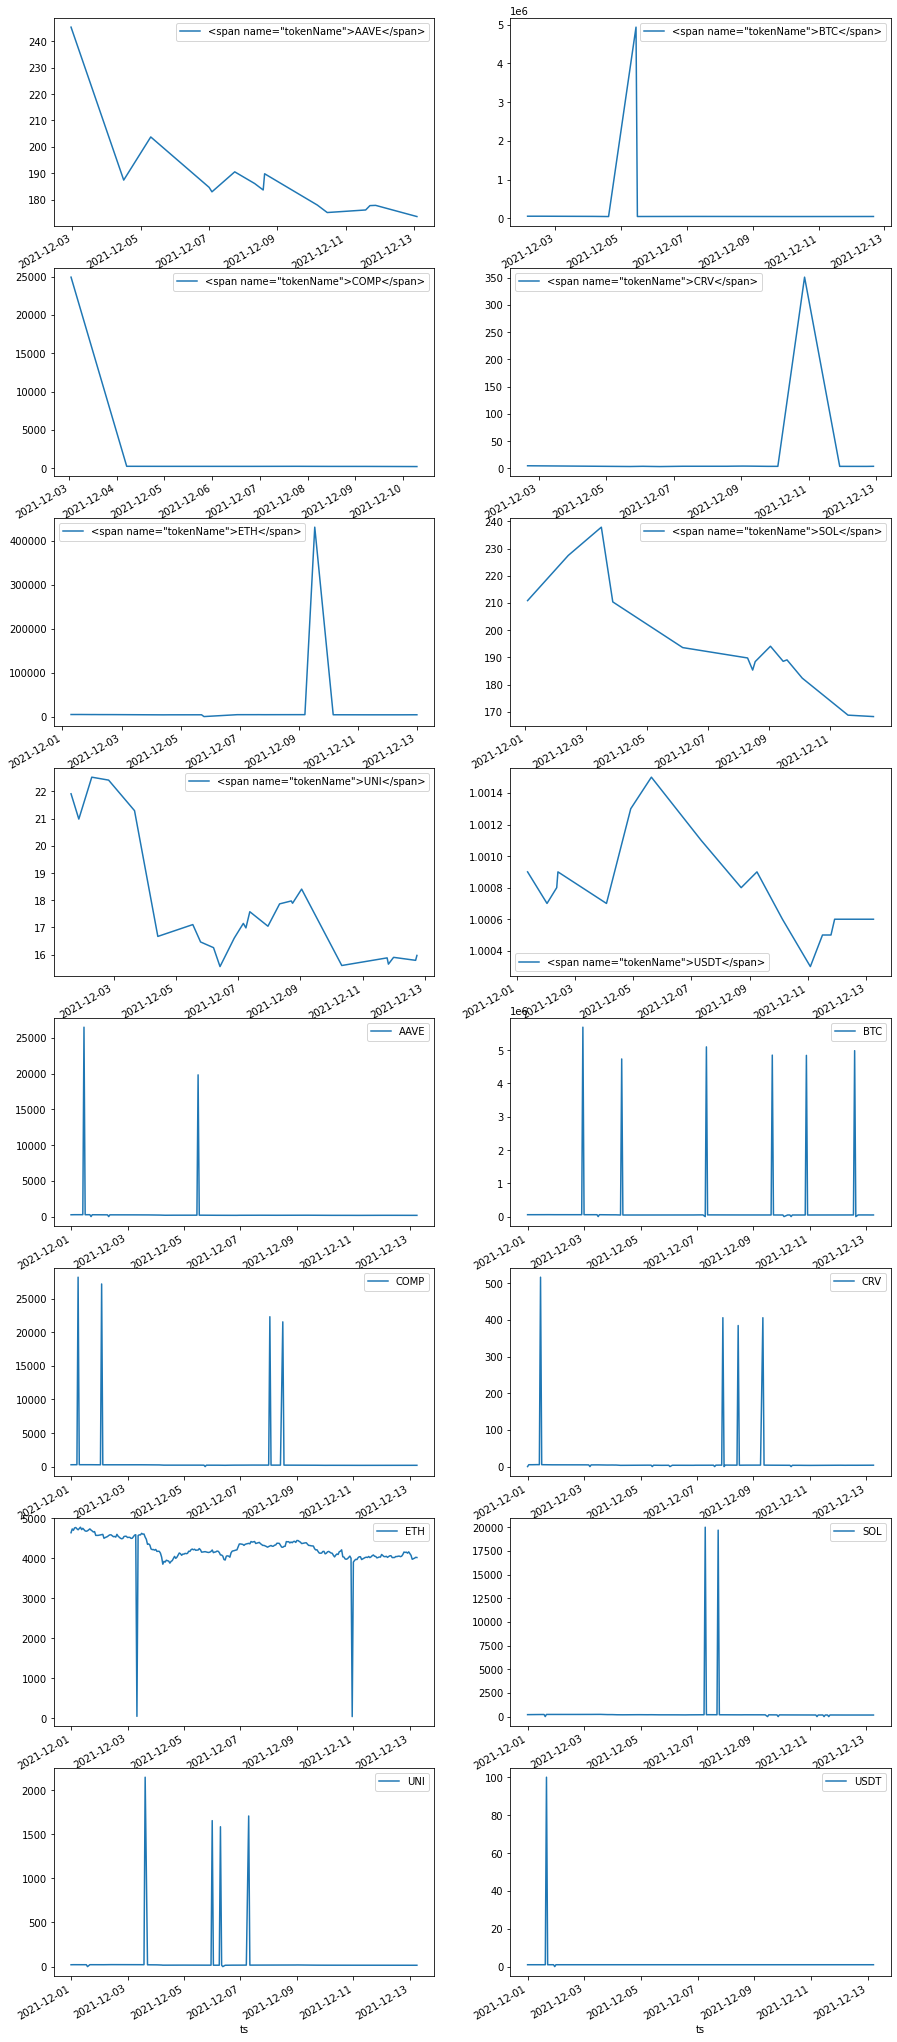

In [15]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [16]:
df.duplicated().sum()

307

In [17]:
df = df.drop_duplicates()

In [18]:
df.token.unique()

array(['<span name="tokenName">AAVE</span>',
       '<span name="tokenName">BTC</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">USDT</span>', 'AAVE', 'BTC', 'COMP', 'CRV',
       'ETH', 'SOL', 'UNI', 'USDT'], dtype=object)

In [19]:
import xml

In [20]:
def remove_tags(text):
    return ''.join(xml.etree.ElementTree.fromstring(text).itertext())

In [21]:
df.token.unique()

array(['<span name="tokenName">AAVE</span>',
       '<span name="tokenName">BTC</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">USDT</span>', 'AAVE', 'BTC', 'COMP', 'CRV',
       'ETH', 'SOL', 'UNI', 'USDT'], dtype=object)

In [22]:
# for token in df.token.unique():
#     remove_tags(token)

In [23]:
df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()


/Users/klimyadrintsev/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [24]:
df.token.unique()

array(['AAVE', 'BTC', 'COMP', 'CRV', 'ETH', 'SOL', 'UNI', 'USDT'],
      dtype=object)

In [25]:
df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
volumeUSD    2360
token           0
chain           0
dtype: int64

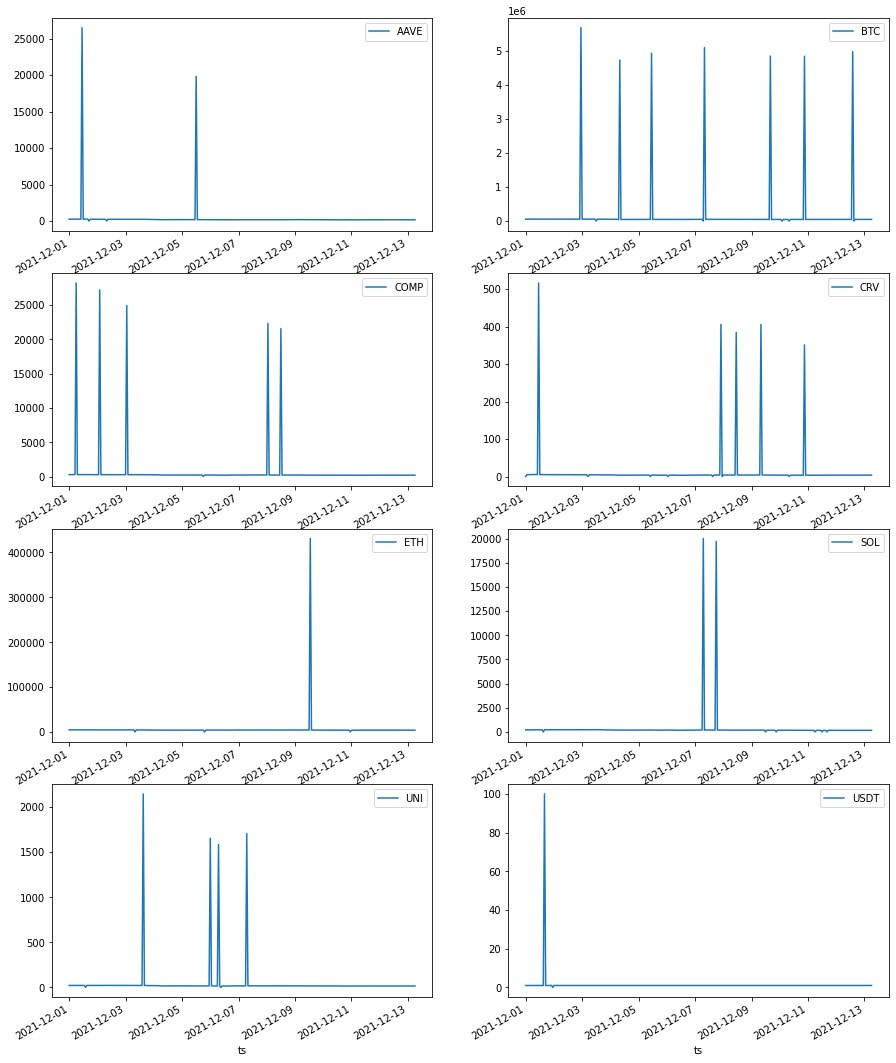

In [26]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [27]:
df = df.drop_duplicates()

In [29]:
df.loc[df.close.isnull() & df.high.notnull() & df.low.notnull(), 'close'] = 0.5 * (df.loc[df.close.isnull() & df.high.notnull() & df.low.notnull(), 'high'] + df.loc[df.close.isnull() & df.high.notnull() & df.low.notnull(), 'low'])
df.loc[df.close.isnull(), 'close'] = df.loc[df.close.isnull(), 'open']


In [ ]:
df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5) & df.high.notnull() & df.low.notnull() , 'close'] = 0.5 * (df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5) & df.high.notnull() & df.low.notnull(), 'high'] + df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5) & df.high.notnull() & df.low.notnull(), 'low'])



In [31]:
#If high and low price is not avaiable, replace the outlier with the open price
df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5), 'close'] = df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5), 'open'] 


df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

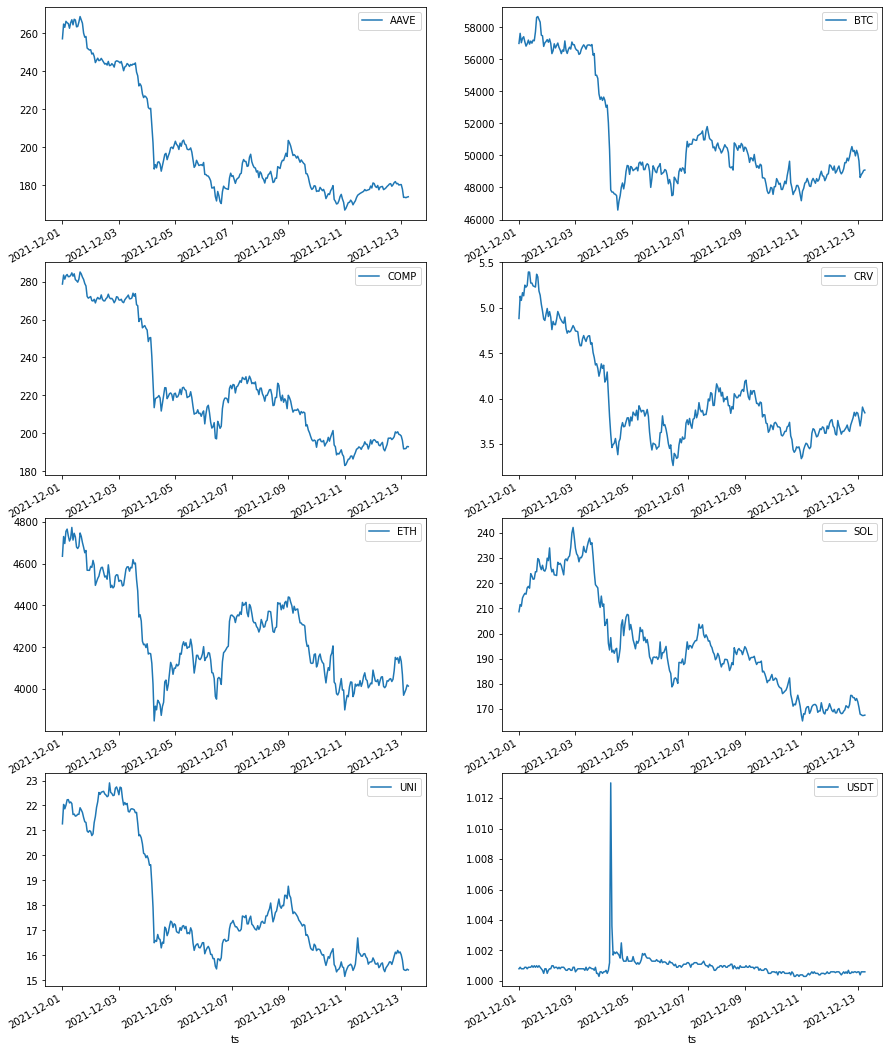

In [33]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

df.loc[df.close / df.open >= 2, 'close']

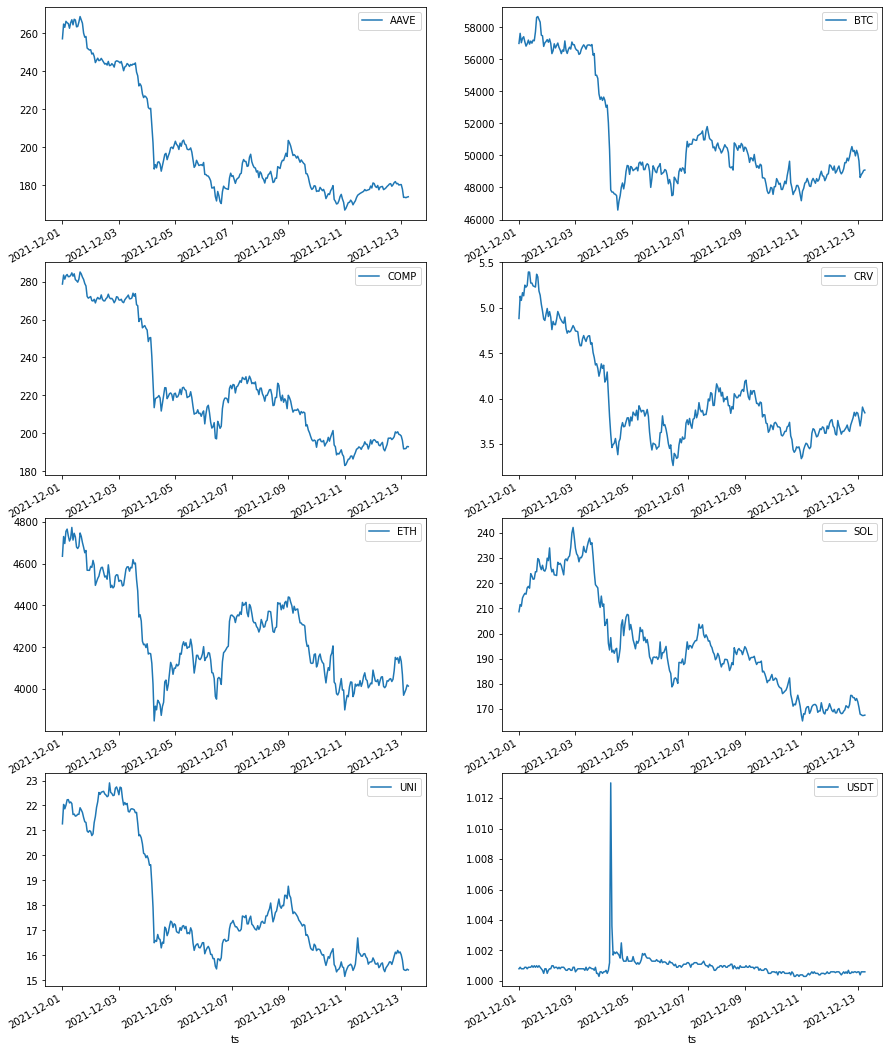

In [34]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [35]:
df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
volumeUSD    2360
token           0
chain           0
dtype: int64

<AxesSubplot:>

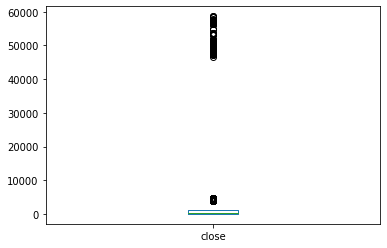

In [36]:
df.close.plot(kind='box')

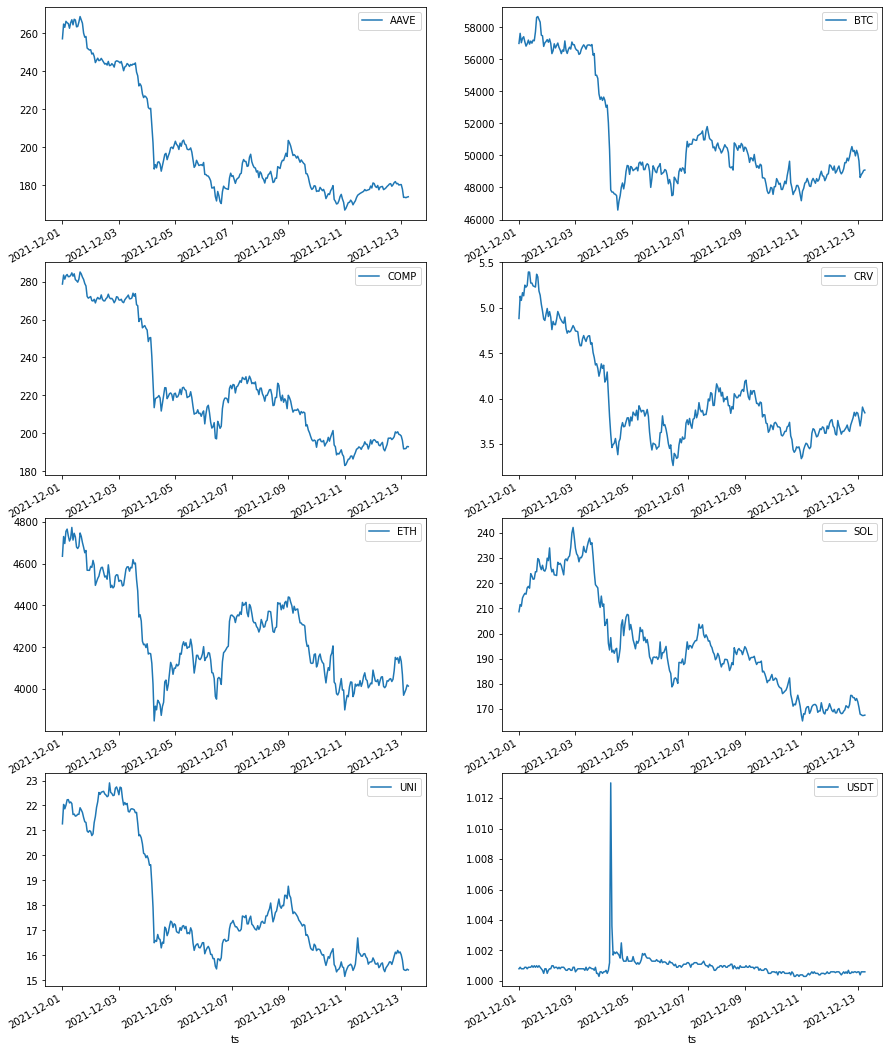

In [37]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [39]:
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 23:00:00,245.542,245.986,244.668,245.327,465.868,NaN,AAVE,ETH
2021-12-04 12:00:00,191.100,191.502,184.611,187.440,4854.272,NaN,AAVE,ETH
2021-12-05 07:00:00,203.197,204.141,184.611,203.764,1483.325,NaN,AAVE,ETH
2021-12-07 00:00:00,186.578,186.916,184.091,184.691,4172.479,NaN,AAVE,ETH
2021-12-07 02:00:00,185.204,186.838,184.091,182.996,2527.875,NaN,AAVE,ETH


In [40]:
df.volumeUSD = df.volume * df.close

In [41]:
df.volumeUSD

ts
2021-12-02 23:00:00    1.142900e+05
2021-12-04 12:00:00    9.098847e+05
2021-12-05 07:00:00    3.022482e+05
2021-12-07 00:00:00    7.706193e+05
2021-12-07 02:00:00    4.625910e+05
                           ...     
2021-12-13 01:00:00    1.552901e+06
2021-12-13 02:00:00    7.136713e+06
2021-12-13 03:00:00    4.340487e+06
2021-12-13 04:00:00    2.930650e+06
2021-12-13 05:00:00    2.180062e+06
Name: volumeUSD, Length: 2360, dtype: float64

In [ ]:
# :(